# Project 1 - Cardio Good Fitness

__Joseph Reves joe.reves@gmail.com__

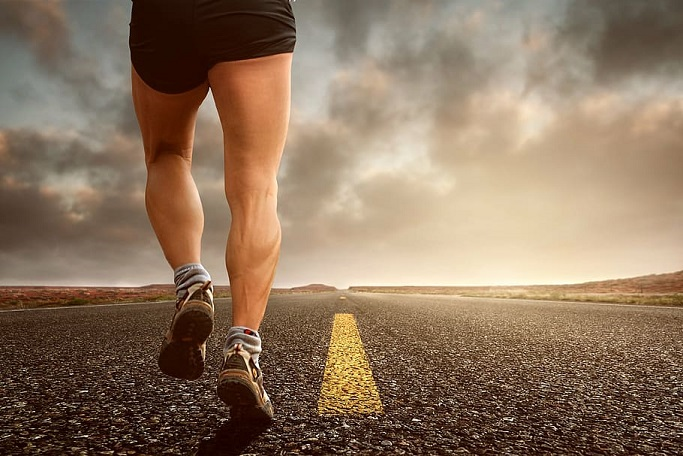

## Objectives:
1. Characterize the available data, and make relevant observations about completeness and relevance
2. Based on the available data, characterize the customers of the products and make observations about their usage
3. Generate a set of business recommendations supported by the analysis <br>
 a. We'll profile the usage and customer characteristics for each product <br>
 b. We'll make specific recommendations to improve the profitability of the product line <br>
 c. We'll suggest how best to target product features and grow the addressable market <br>

* In meeting these objectives, we'll analyze and visualize each of the variables in the dataset, and analyze the relevant relationships between these elements


## Background:

Good Cardio Fitness is a retailer of treadmill fitness products. The dataset we're analyzing in this report includes some demographic information about customers and how they are using these products. Our goal is to explore the available data, generate some useful insights for the business, and make some specific recommendations.

## Summary of the data:

- **CardioGoodFitness.csv:** This is our user demographics dataset, anonymized. Note that individual customer IDs are not included
  * **Columns:**
    * **Product:** This is the treadmill product the customer has purchased and is using
    * **Age:** The age of the customer
    * **Gender:** The customer's gender
    * **Education:** The highest attained education level for the customer
    * **MaritalStatus:** The customer's marital status
    * **Usage:** Average number of times the customer uses the equipment per week
    * **Fitness:** The self-reported fitness score of the customer at the time of purchase (5 - very fit, 1 - very unfit)
    * **Income:** The household income of the customer
    * **Miles:** The number of miles per week the customer runs on the treadmill
    

## Import the relevant python libraries for our analysis and visualization

In [1]:
# statistical analysis functions, and data structure manipulation
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# configure matplotlib to display immediately
%matplotlib inline

# useful utilities
import pandas_profiling


## Read our customer data into a structure we can use to begin our analysis

<div class="alert alert-block alert-info">
<b>Dependency:</b> Loading the "CardioGoodFitness.csv" file from the local directory where the notebook is stored. For this project, I'm using Anaconda on my local machine.
</div>

In [1]:
# Reading the cardio dataset with the read_csv function from pandas package
cardio = pd.read_csv("CardioGoodFitness.csv")

NameError: name 'pd' is not defined

## Characterize the available data set, and the completeness of the data

### Sanity Checks

In [3]:
# Let's have a look at the column headers, and the first few rows of information
cardio.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

In [4]:
print ("The available data includes",cardio.shape[0],"rows, with",cardio.shape[1],"columns of information")

The available data includes 180 rows, with 9 columns of information


In [5]:
# Let's have a look at how the data is currently typed by python
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
# Which products are represented in this data?
products = cardio['Product'].unique()

In [7]:
# Are each of the products well-represented in the data?
for model in products:
    print (model,':',len(cardio[cardio['Product'] == model]), 'records')


TM195 : 80 records
TM498 : 60 records
TM798 : 40 records


In [8]:
# confirm there are no null values in the data
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
# find missing data
cardio.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [10]:
# statistically profile the data, include all numeric / non-numeric variables
cardio.describe(include='all')

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      TM195         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

__Observations on data sanity checks__
  * We have data for customers of three treadmill products, and a substantial number of records for each
  * It doesn't appear we have unique identifiers for our records, e.g. customer IDs, or sales transaction IDs
  * Looks like the data is complete, with consistent non-null counts for all columns
  * Data types are as expected, with "Education" represented as the highest grade level completed. We could break this down further into catagories like "High School", "Some College", "Undergraduate", "Post-Graduate", etc. 
  * "Usage" and "Miles" are per-week
  * We could also provide more meaningful labels for the self-reported fitness levels

### Data Transformations

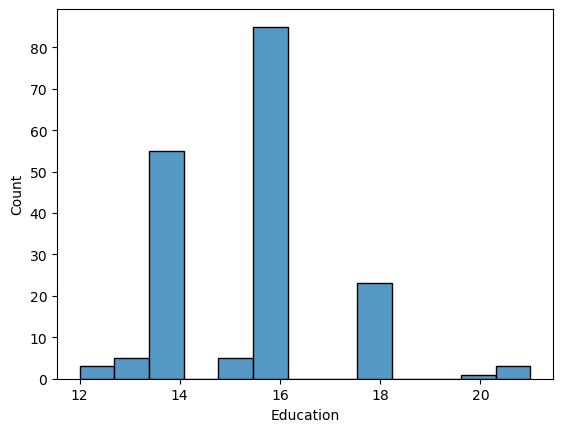

In [11]:
# Let's take a closer look at education in the data
sns.histplot(data=cardio,x='Education');

Education lends itself to categorization into bins where we might use these bins to better target advertising, or to position product models for a particular buyer. Let's add a category to the data we can analyze later that characterizes the level of education and the type of school each of these customers is likely enrolled in.

In [12]:
# using the pd.cut() function to create bins to map years of education into schooling levels
cardio['Education_Level'] = pd.cut(cardio['Education'],bins=[0,12,16,18,21],labels=['High_School','UnderGrad','PostGrad','Advanced'])

In [13]:
cardio.sample(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
108   TM498   26  Female         16     Partnered      4        3   45480   
7     TM195   21    Male         13        Single      3        3   32973   
89    TM498   23  Female         16        Single      3        3   45480   
110   TM498   26    Male         16        Single      4        3   51165   
63    TM195   35    Male         16     Partnered      4        3   48891   
30    TM195   25  Female         14     Partnered      3        3   39795   
106   TM498   25  Female         14        Single      2        2   45480   
165   TM798   29    Male         18        Single      5        5   52290   
140   TM798   22    Male         14        Single      4        3   48658   
58    TM195   32    Male         14     Partnered      4        3   52302   

     Miles Education_Level  
108     85       UnderGrad  
7       85       UnderGrad  
89      95       UnderGrad  
110    106       UnderGrad  
63      85       UnderGrad  
30      85       UnderGrad  
106     42       UnderGrad  
165    180        PostGrad  
140    106       UnderGrad  
58      85       UnderGrad

### Duplicate data handling

There are no unique identifiers in this data set, and no indication of duplicates

### Missing Data

Missing data is not a factor in this data set

### Summary

  * At a glance, we have a pretty small customer base represented in this data, with only 180 customers.
  * If I were working with a data set this small in production, I would suspect this is sampled data
  * We offer three treadmill versions, with the TM195 product being the most popular
  * The majority of our customers seem to be married, college educated, men, and under 30
  * Our customers plan to use the equipment 3-4 times per week, on average
  * Our customers are generally middle-class in income, although we have some more affluent customers
  * Our customers are serious runners. Planning to run an average of 103 miles a week in 3-4 sessions is hard-core.
 

## Analysis of individual variables

#### Histogram / Boxplot Function Definition

I really like this simple combined view with boxplot and histogram for univariate analysis, so I'm going to borrow that from the Week 3 curriculum. Added an option for "hue" that will overlay the bars, and color the larger value. Looking at a single variable in context of another can be insightful.

In [14]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature,figsize=(12, 7), kde=False, bins=None, hue=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if (bins) and (hue):
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, hue=hue, bins=bins, color="mediumpurple") 
    elif bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    elif hue:
      sns.histplot(data=data, x=feature, kde=kde, hue=hue,ax=ax_hist2, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

#### Product

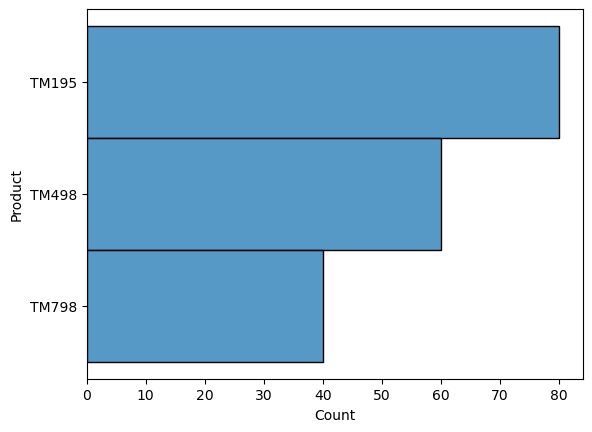

In [15]:
# Here's a simple breakdown of the proportions of the products represented in our data
sns.histplot(data=cardio,y='Product');

In [16]:
# Products by percentage in our customer base
product_counts = cardio['Product'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print (product_counts)

TM195    44.4%
TM498    33.3%
TM798    22.2%
Name: Product, dtype: object


#### Age and Gender

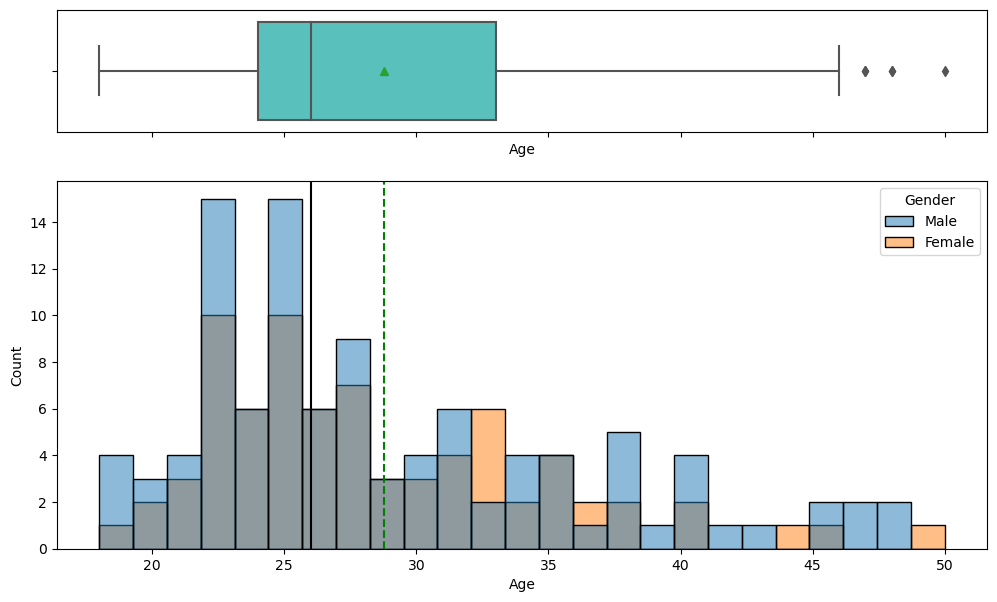

In [17]:
# Looking at age here, broken down by gender
histogram_boxplot(cardio,'Age',hue='Gender',bins=25)

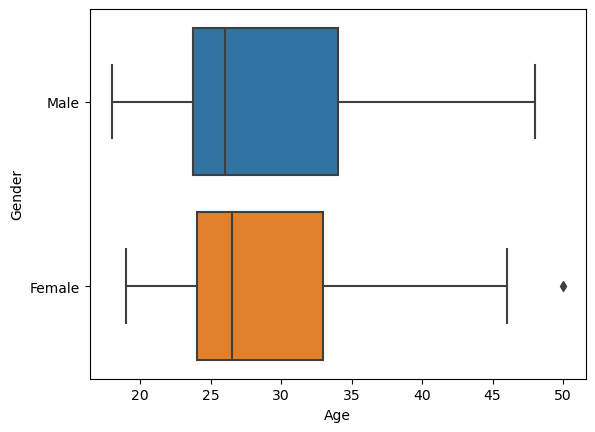

In [18]:
# Age, by gender category.  Looking for significant outliers
sns.boxplot(data=cardio,x='Age', y='Gender');

In [19]:
# what are the average ages for each gender?
print ( round(cardio.groupby('Gender').mean()['Age']))

Gender
Female    29.0
Male      29.0
Name: Age, dtype: float64


In [20]:
# This gives us a breakdown of the percentage of male and female customers represented in our dataset
genders = cardio.groupby(['Gender'])['Age'].count()
gender_sum = genders.sum()
gender_percent = round(genders.apply(lambda x: 100*x/gender_sum))
print (gender_percent)

Gender
Female    42.0
Male      58.0
Name: Age, dtype: float64


#### Education

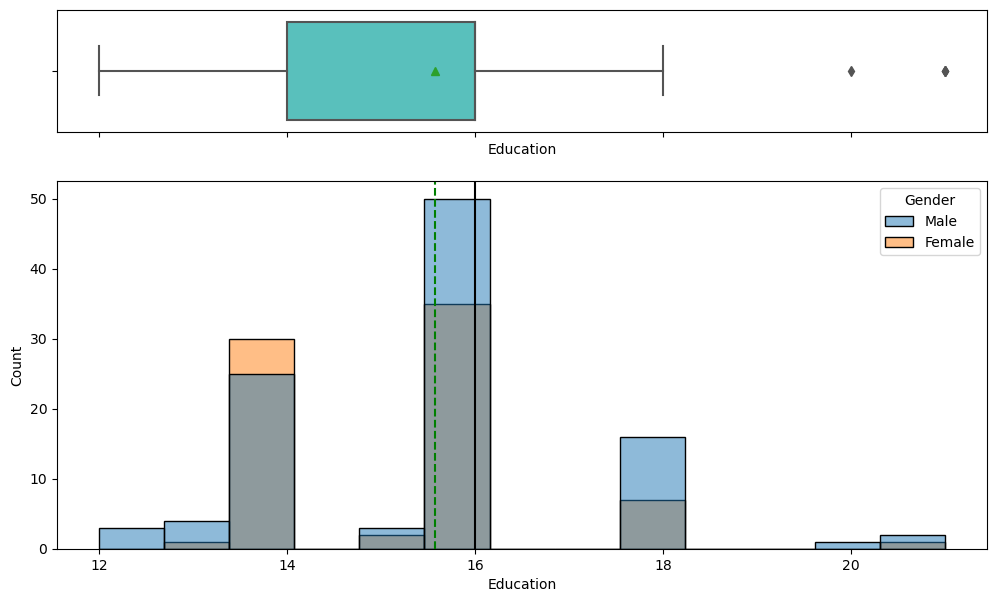

In [21]:
# Here's the education level reported (in years of schooling) broken down by gender
histogram_boxplot(cardio,'Education',hue='Gender')

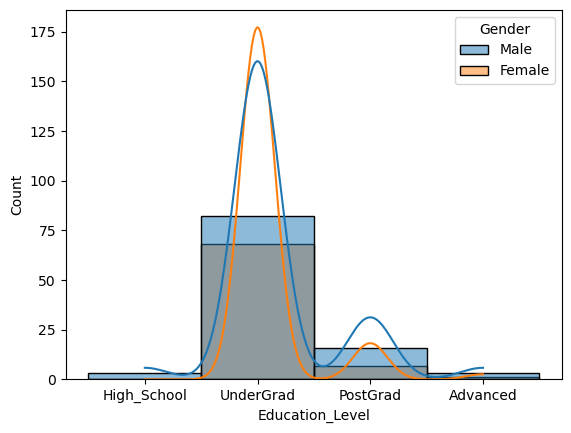

In [22]:
# For this plot, we'll use the new Education Level categories we created from the reported years of education data
sns.histplot(data=cardio,x='Education_Level',hue='Gender', kde=True);

#### Marital Status

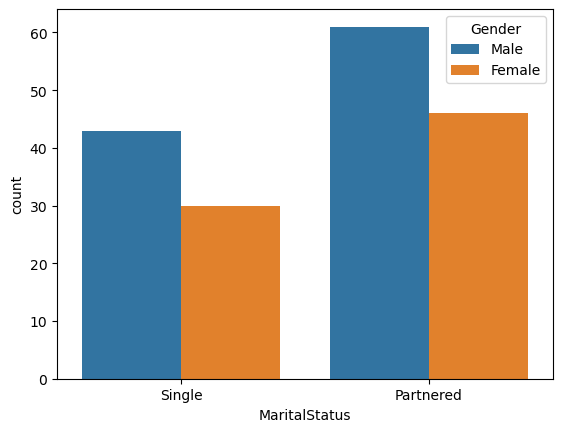

In [23]:
# Let's break down marital status. Not all of our customers are partnered with each other, so we'll use hue to view by gender
sns.countplot(data=cardio,x='MaritalStatus', hue='Gender');

In [24]:
# Let's get a simple breakdown of customers by marital status
print ("{0:.0%}".format(len(cardio[cardio['MaritalStatus'] == 'Partnered']) / len(cardio['MaritalStatus'])),'of our customers are partnered')
print ("{0:.0%}".format(len(cardio[cardio['MaritalStatus'] == 'Single']) / len(cardio['MaritalStatus'])),'of our customers are single')

59% of our customers are partnered
41% of our customers are single


In [25]:
# Break up our dataset by marital status to plot each independently
singles = (cardio[cardio['MaritalStatus'] == 'Single'])
couples = (cardio[cardio['MaritalStatus'] == 'Partnered'])

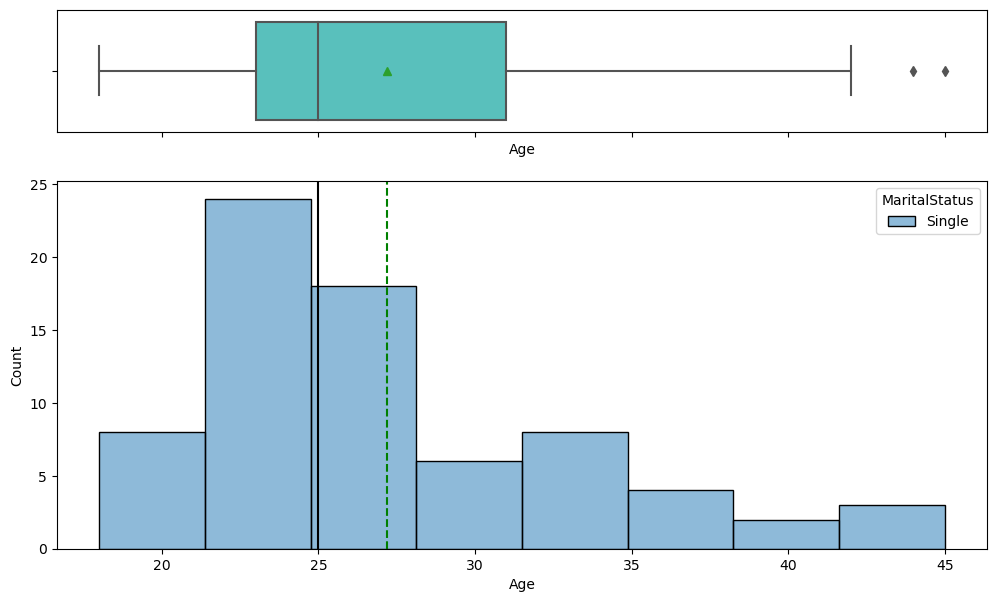

In [26]:
# These are our singles only, by age range
histogram_boxplot(singles,'Age',hue='MaritalStatus')

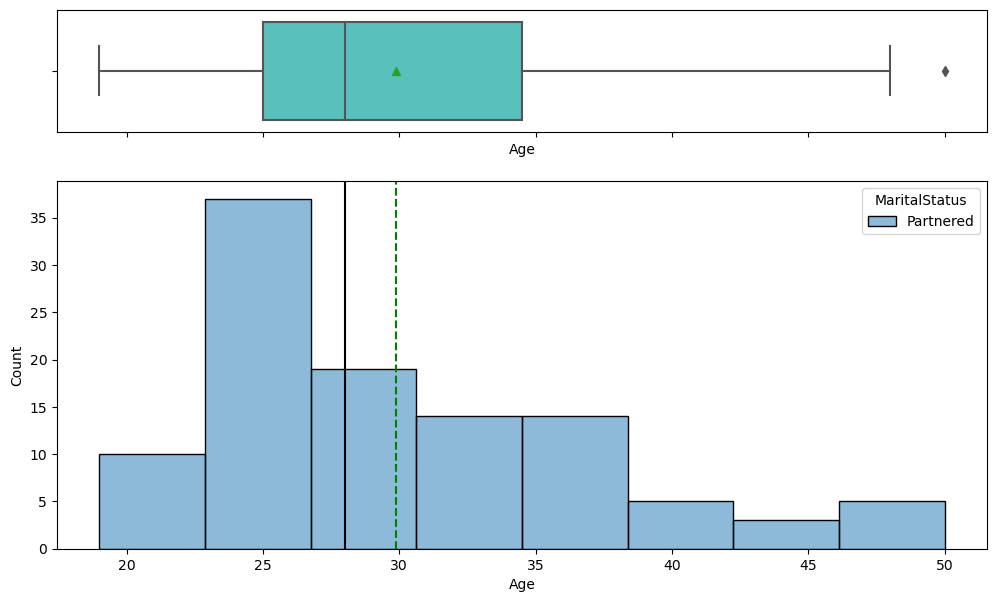

In [27]:
# And our married couples, also by age
histogram_boxplot(couples,'Age',hue='MaritalStatus')

#### Income

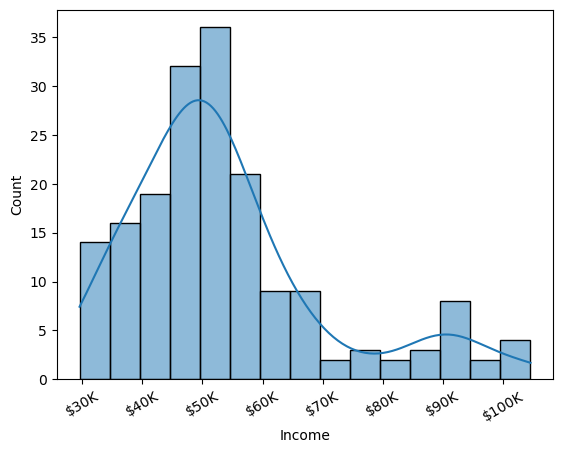

In [28]:
# Let's look at the distribution of income for our customers
graph = sns.histplot(data=cardio,x='Income', kde=True)
graph.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1000) + 'K'))
plt.xticks(rotation=30);


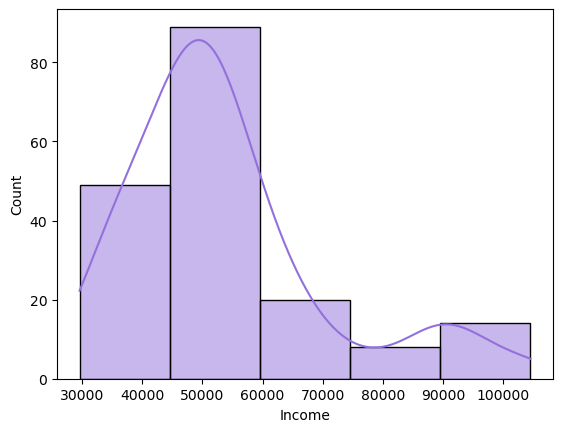

In [29]:
sns.histplot(data=cardio, x='Income', kde=True, bins=5, color="mediumpurple");

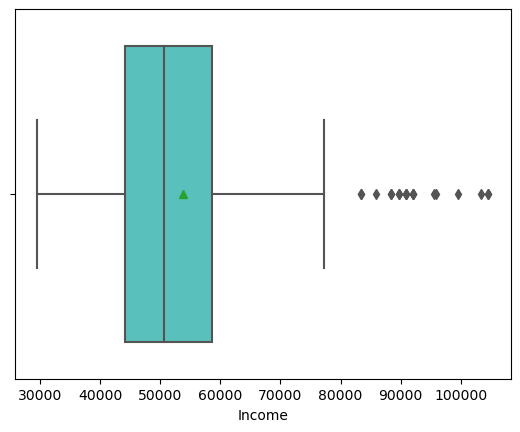

In [30]:
sns.boxplot(data=cardio, x='Income',showmeans=True, color="mediumturquoise");

#### Usage, Miles, and Fitness

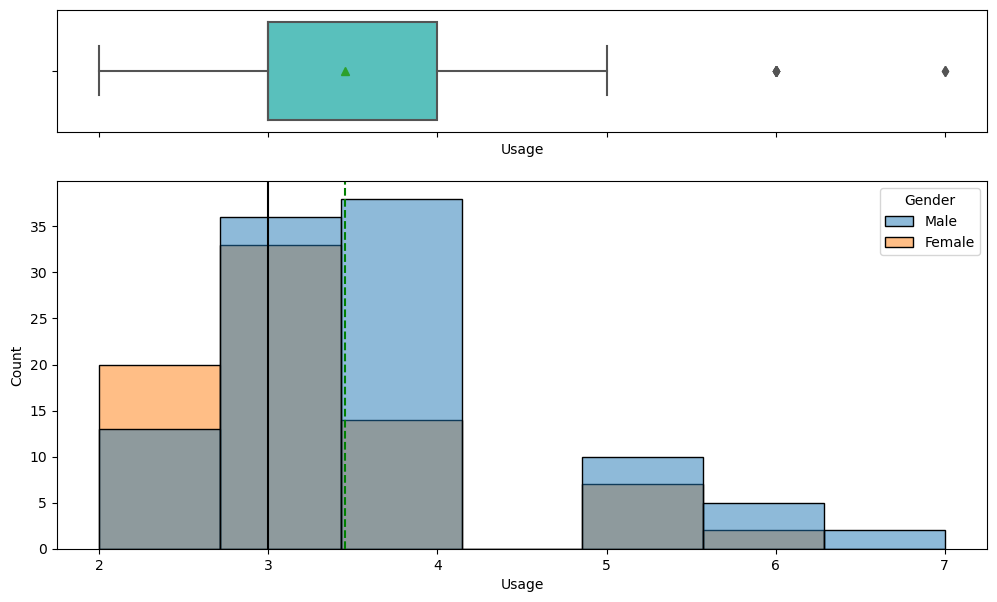

In [31]:
# Let's look at usage, in the context of gender. This is the number of sessions per week
histogram_boxplot(cardio,'Usage',hue='Gender',bins=7)

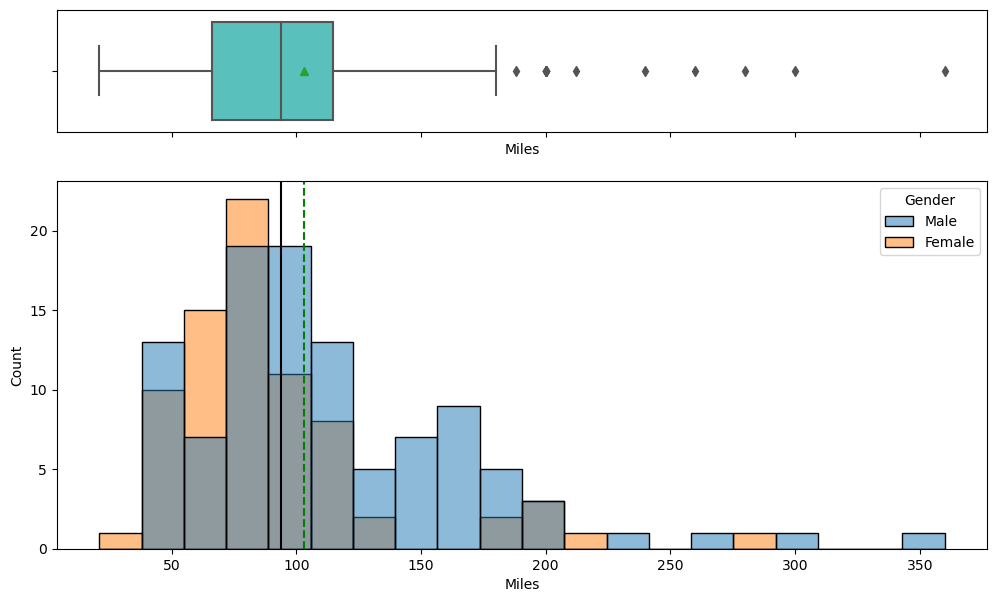

In [32]:
# Miles per week that customers report planning to run on the treadmill, broken down by gender
histogram_boxplot(cardio,'Miles',hue='Gender')

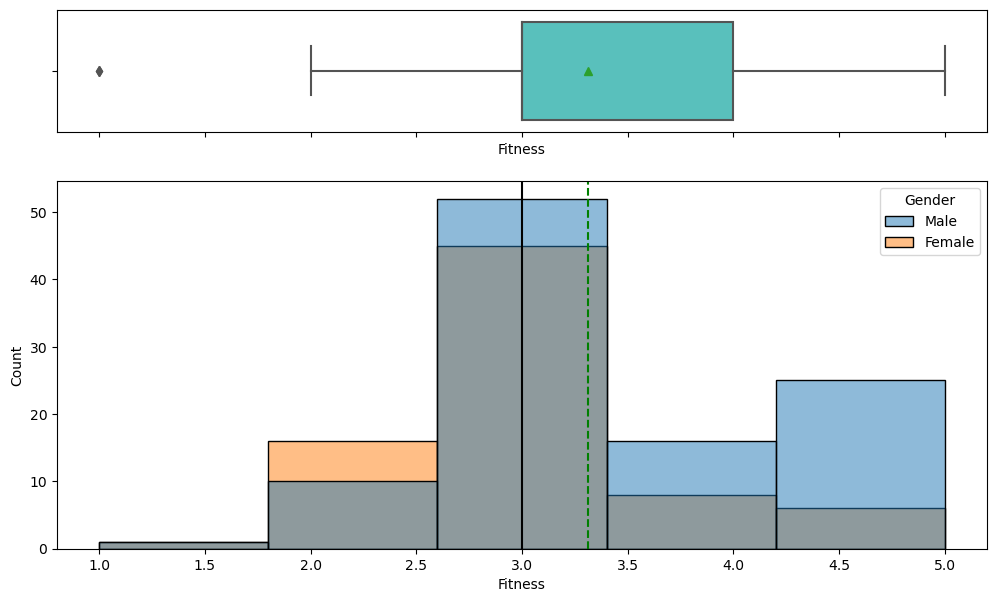

In [33]:
# self-reported fitness levels, by gender
histogram_boxplot(cardio,'Fitness',hue='Gender',bins=5)

### Outliers Handling

While we see outliers in the income data, the data itself seems entirely plausible and rational. Rather than treat or exclude these outliers, they will be the subject of further analysis in our multivariate section to help us understand the characteristics and buying behaviors of customers at this income level.  So - we note the outliers, but __the decision here is that these values do not require treatment.__

One other area where we're showing some significant outliers is in the "Miles" data. This is the distance in miles that "..the customer expects to run" per week.  Some of these values are pretty clearly unrealistic; let's take a closer look.

In [34]:
# Let's get the miles column stats for the entire dataset
stats = cardio['Miles'].describe()

In [35]:
# calculate the value for the upper whisker of our miles boxplot. The index valies of [4] and [6] are the 25th and 75th percentiles
print ('1.5 times the IQR above the 3rd quartile is:',int(((stats[6]-stats[4])*1.5)+stats[6]),'miles.')

1.5 times the IQR above the 3rd quartile is: 187 miles.


In [36]:
# what are the expectations of our highest mileage customers? These are our outliers
high_mileage = cardio[cardio['Miles'] > 187]
print ('We have', len(high_mileage), 'customers that expect to run more than 187 miles per week','(','{:.0%}'.format(len(high_mileage)/len(cardio)),'of our customers',')')

We have 13 customers that expect to run more than 187 miles per week ( 7% of our customers )


In [37]:
# Get the statistics for the Usage column in our high-mileage slice of the data
useage_stats = high_mileage['Usage'].describe()

In [38]:
# Get the statistics for the Miles column in our high-mileage slice of the data
miles_stats = high_mileage['Miles'].describe()

In [39]:
# The index [1] element of our statistics is the mean value for the column, and that's what we'll call out here
print ('In an average of',int(useage_stats[1]),'sessions per week, our most ambitious runners intend to cover',int(miles_stats[1]),'miles each week.')
print ('That\'s about',int(miles_stats[1]/useage_stats[1]),'miles/session.')

In an average of 5 sessions per week, our most ambitious runners intend to cover 233 miles each week.
That's about 44 miles/session.


We know a full marathon is about 26 miles, and an average participant takes about 4.5 hours to run it. 

A world-class athlete can run it in 2 hours or so. Running multiple full marathon courses per week __seems unrealistic, but aspirational.__  

Let's look at the self-reported fitness levels for our aspiring marathon trainees:

In [40]:
high_mileage['Fitness'].describe()

count    13.000000
mean      4.846154
std       0.375534
min       4.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Fitness, dtype: float64

The customers expecting to run these very high mileage sessions 5 times a week also assess their fitness fairly high, which is to be expected. But nonetheless, running 40 miles five times a week is unlikely. Let's look at the expectations for the remainder of our customers:

In [41]:
lower_mileage = cardio[cardio['Miles'] < 187]
print ('We have', len(lower_mileage), 'customers that expect to run less than 187 miles per week','(','{:.0%}'.format(len(lower_mileage)/len(cardio)),'of our customers',')')
lower_mileage_stats= lower_mileage['Miles'].describe()
print ('On average, they expect to run', int(lower_mileage_stats[1]),'miles per week.')

We have 167 customers that expect to run less than 187 miles per week ( 93% of our customers )
On average, they expect to run 93 miles per week.


This is still very aspirational, but it's a little more realistic than some of our outliers.

There are a few options for dealing with these that I am considering:
  * Discard the "miles" data altogether. None of our customers seem to have a very realistic idea about how far they will run per week, and all their estimates seem a bit aspirational. Use "usage" as a more reliable indicator of how much use they intend to get on the treadmill.
  * Use the mean of the majority of the customers as an indication of their sentiment or intent, even if the actual number of miles they run is less than they estimate they will run.
  * I could use the cutoff (1.5 times the IQR) as an indicator for my "high-mileage" customers, to signal their intent to use the treadmill more intensively, even if the number of miles they actually run is less.
  
Using the "miles" estimate as a signal of intent is useful, even if the actual miles are less. So, of the three options, the third seems more useful to profile the usage and mileage of my target customers. 

__So: my decision to deal with the "miles" outlier customers is to cap the "miles" value for those customers with the 1.5 times the IQR plus the 75% value.__ 


__For later analysis, I'll add a column to the dataset to represent the number of miles verses the usage per week, to calculate how many miles our customers expect to run each session with our product.__

These self-reported values look high - let's break them down into miles/use, and see how realistic they are.

In [42]:
# Add a column to the data to represent the expected miles/use for each customer. We'll look for trends by product
cardio['MilesPerUse'] = round(cardio['Miles'] / cardio['Usage'])
cardio.sample(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
178   TM798   47    Male         18     Partnered      4        5  104581   
119   TM498   32    Male         16     Partnered      3        3   53439   
79    TM195   50  Female         16     Partnered      3        3   64809   
88    TM498   23    Male         14     Partnered      3        3   38658   
62    TM195   34  Female         16        Single      2        2   52302   
121   TM498   33  Female         16     Partnered      2        3   50028   
156   TM798   25    Male         20     Partnered      4        5   74701   
29    TM195   25  Female         14     Partnered      2        2   53439   
107   TM498   25    Male         14        Single      4        3   48891   
103   TM498   25    Male         14     Partnered      4        3   45480   

     Miles Education_Level  MilesPerUse  
178    120        PostGrad         30.0  
119     95       UnderGrad         32.0  
79      66       UnderGrad         22.0  
88      85       UnderGrad         28.0  
62      66       UnderGrad         33.0  
121     85       UnderGrad         42.0  
156    170        Advanced         42.0  
29      47       UnderGrad         24.0  
107    127       UnderGrad         32.0  
103    170       UnderGrad         42.0

We'll trim the mileage outliers next, but we'll keep this value to analyze by Product

#### Outlier Treatment function definition

In [43]:
# This function will accept a dataframe and column, and reset all outliers in the column to the upper and lower whiskers
# It returns a new dataframe, rather than updating in place
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

#### Treat the mileage outliers

In [44]:
# pass the Miles column in our cardio dataset to the outlier treatment function
cardio_noOutliers = treat_outliers(cardio,'Miles')

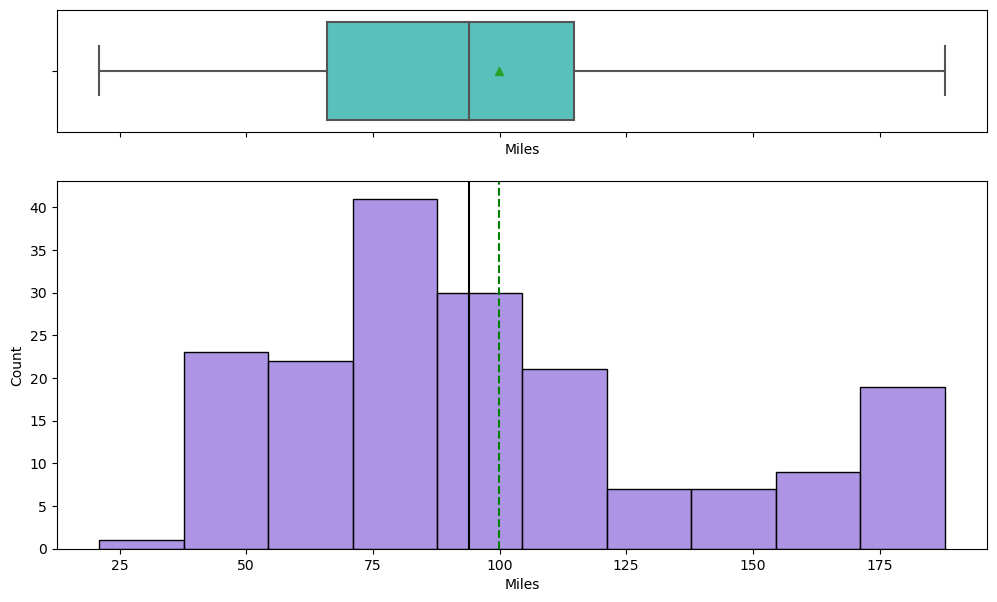

In [45]:
# confirm the mileage values have been treated
histogram_boxplot(cardio_noOutliers,'Miles')

In [46]:
# write out the treated dataset with our new mileage values
cardio_noOutliers.to_csv('CardioGoodFitness_NoOutliers.csv',index=False)

### Observations

 * __Product__
     * Our TM195 model is the most popular model, with 44% of sales. We'll plan to do a multivariate analysis as we develop our customer profiles that will correlate the models with income level, age, and usage.
     * Our three models are well-represented in the dataset
 * __Age and Gender__
     * For both genders, our average age is 29 years old
     * 58% of our customers are male, 42% female
     * Our data is weighted in the early/mid 20's, but there's a long right-tailed distribution
     * We have some outliers in the female customers, but the data appears valid (max age is 50)
 * __Education__
     * Our sweet spot is the undergrad customer, which is consistent with the age data
     * There's a bimodal distribution, with a slight increase of post-grad level customers
     * A few outliers with advanced education, which is consistent with the age distribution
 * __Marital Status__
     * 59% of our customers are married
     * The average age of our married customers is slightly older than the single customers
 * __Income__
     * For our products, the weight is in the \\$50K range, but there's a long tail out to \\$100K
     * This distribution is bimodal, with a small bump out at about \\$75K
     * We'll want to understand who's buying which products when the customer's income is in the higher ranges
     * There are outliers we'll want to investigate, but the data itself - the reported income - seems rational
     
 * __Usage, Miles, and Fitness__
     * These are all self-reported, and seem both aspirational and subjective. 
     * I think we can use these as indications of intent, but we should be cautious about interpreting them literally
     * Women seem to estimate their miles and usage on the lower end of the range than men
     * As noted in the Outliers section, some of the estimates for miles/week seem implausible

## Multivariate and Correlations Analysis

In [47]:
# let's read in our corrected dataset back into the "cardioTreated" dataframe
cardioTreated = pd.read_csv("CardioGoodFitness_NoOutliers.csv")

Let's get an overview of our strongly correlated data:

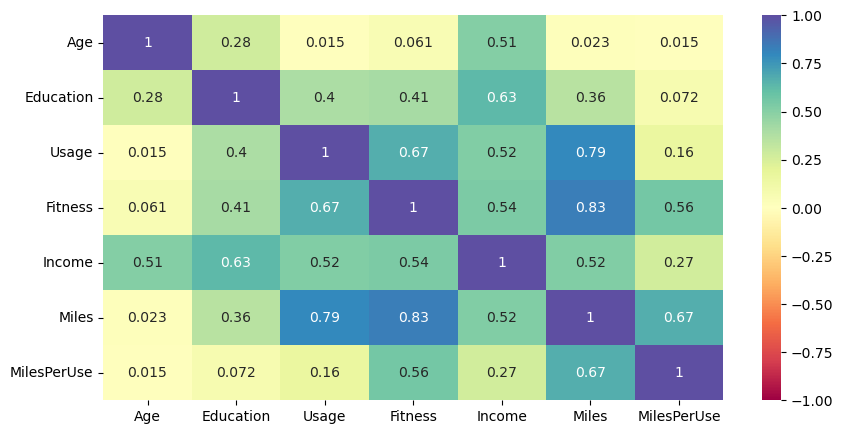

In [48]:
# The heatmap will give us a correlation matrix of our numeric data
plt.figure(figsize=(10,5))
sns.heatmap(cardioTreated.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* We have a handful of strong correlations here, which are mostly predictable. 
* Usage, fitness, and miles/week all generally correlate strongly
* Age and income, as well as age and education correlate.
* __There's also an interesting positive correlation with income and the fitness, usage, and miles values__

In [49]:
# enumerate our numeric values for our pairplot
numeric_vars = ['Age','Education','Usage','Fitness','Income','Miles','Product']
# Add 'Product' to breakout the plots by product specific trends

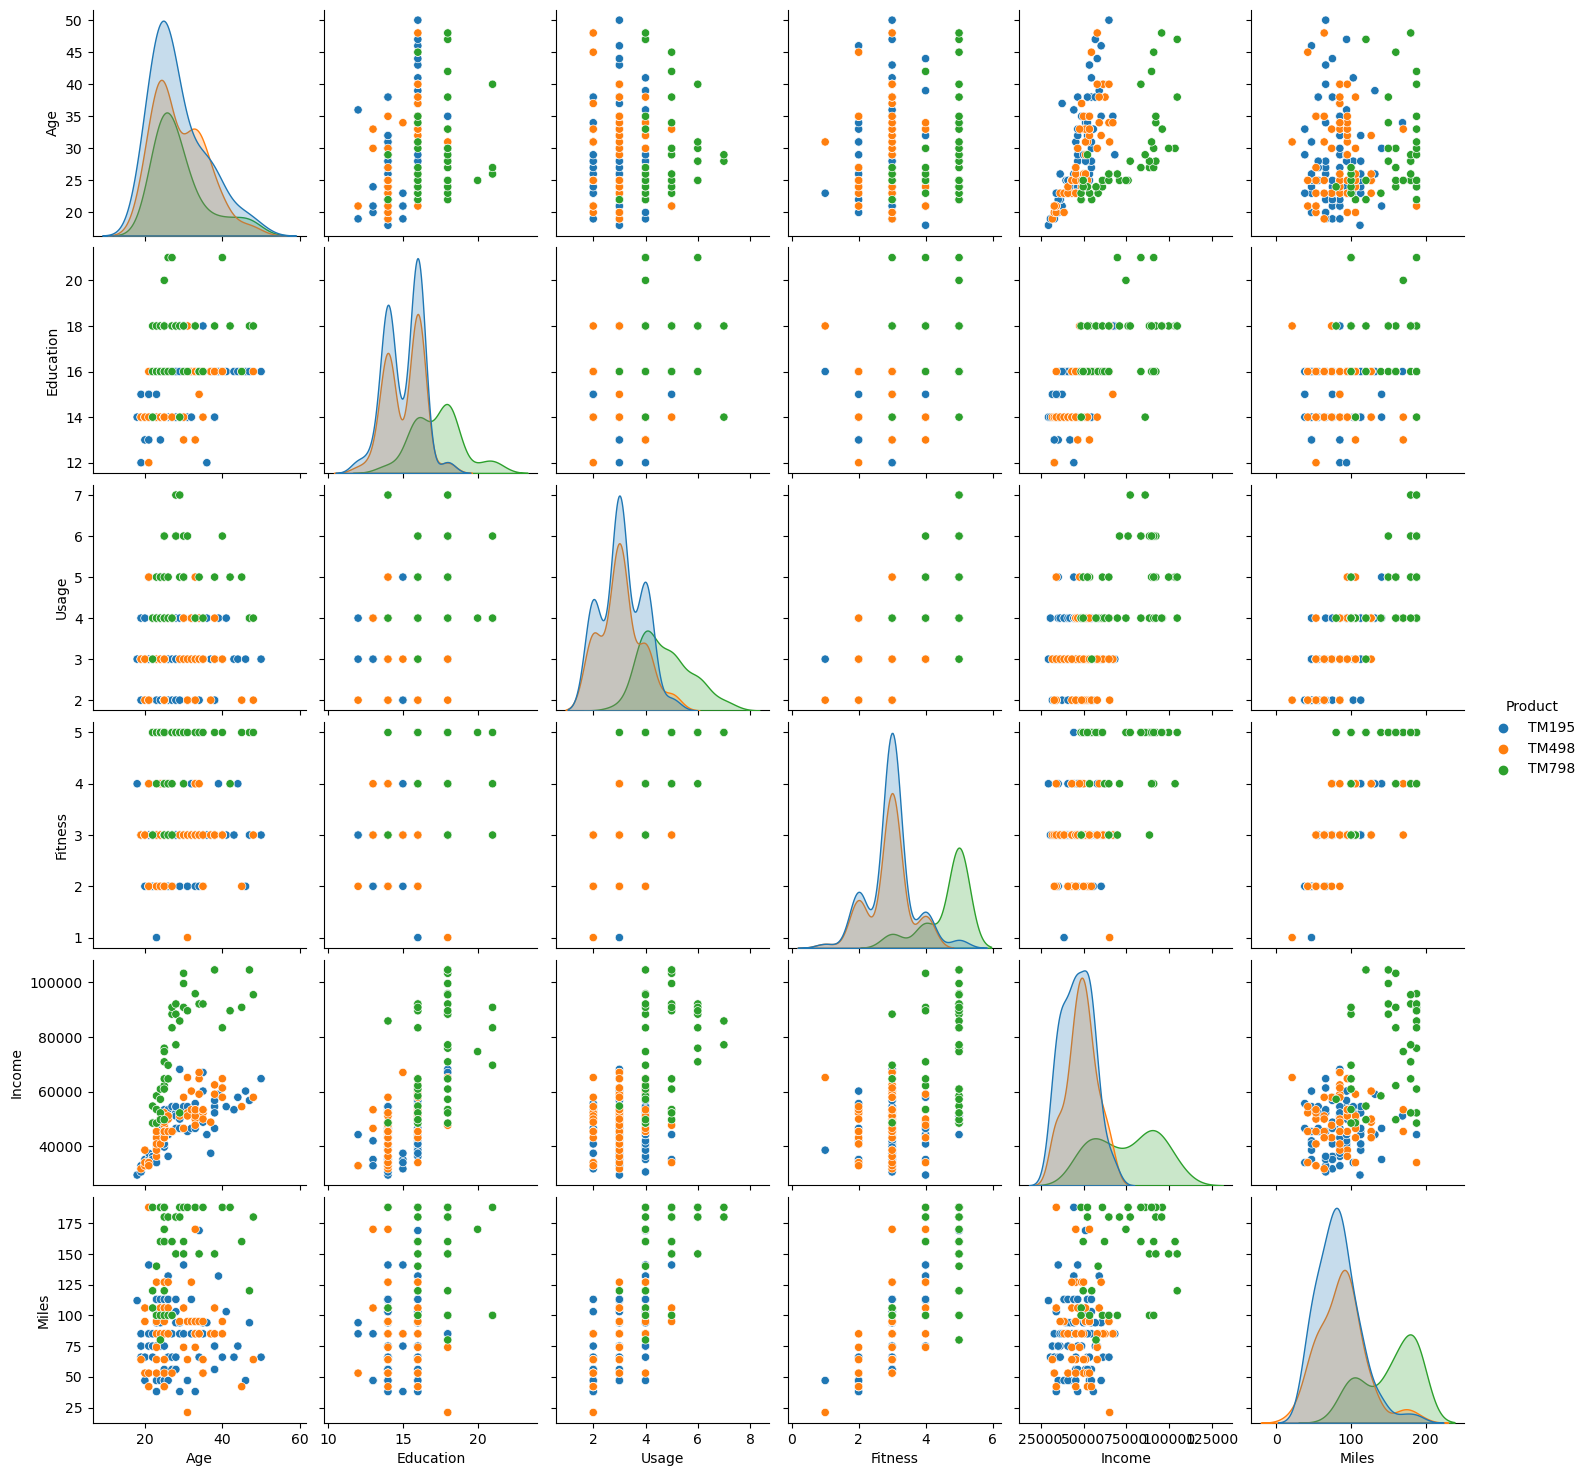

In [50]:
# Plot our numeric values against each other
sns.pairplot(data=cardioTreated[numeric_vars],hue='Product',diag_kind="auto");

* In this plot, we see that many of our numeric values are actually categorical in nature
* We can also see evidence of that positive correlation with income, and the fitness/miles/usage indicators
* For the TM798, we see a clear indication of higher fitness, more miles, and customers with higher incomes and education

Our categorical data is education level, gender, marital status, and of course product. Let's take a closer look at these.

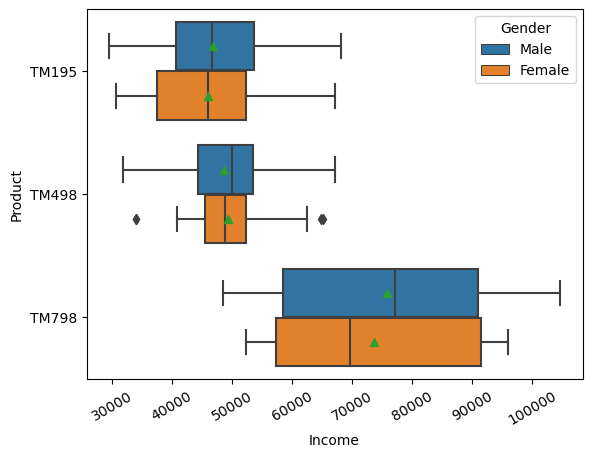

In [51]:
# Let's correlate income with product, and we'll break that out by gender
sns.boxplot(data = cardioTreated, y = "Product", x = "Income", hue='Gender',showmeans=True)
plt.xticks(rotation=30);

* Our TM798 users are clearly correlated with higher incomes.
* In terms of income, the ranges are roughly the same for both the TM195 and TM498 products
* Mean income for both men and women track fairly closely within each product
* We should see if there are other differentiators between TM195 and TM498 customers

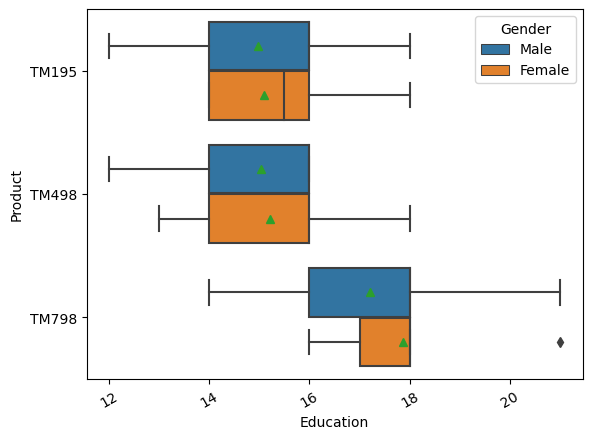

In [52]:
# Let's correlate education with product, and we'll break that out by gender
sns.boxplot(data = cardioTreated, y = "Product", x = "Education", hue='Gender',showmeans=True)
plt.xticks(rotation=30);

* Users with higher education levels are buying the TM798
* This is where we're seeing that bump in the income, for higher educated customers

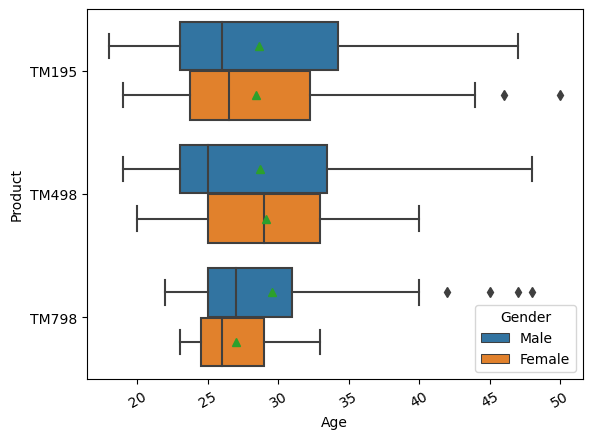

In [53]:
# Let's correlate age with product, and we'll break that out by gender
sns.boxplot(data = cardioTreated, y = "Product", x = "Age", hue='Gender',showmeans=True)
plt.xticks(rotation=30);

* Mean ages for treadmill users are consistent between all models.
* Women using the TM798 start a little younger. If they are married, that might be a good entry point for the more expensive model
* We have some older male outliers using the TM798 product, and a few older female outliers using the TM195
* We may have product features with the TM195 versus the TM798 that appeal differently to older men and women

* Bearing in mind that both miles and usage are aspirational - self-reported intentions - our TM798 customers expect to both use the treadmill more, and run longer distances


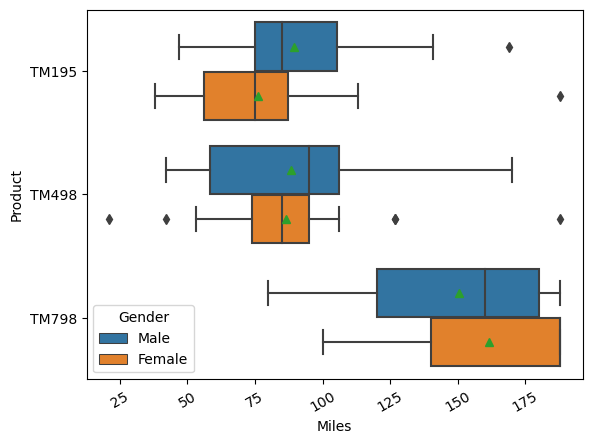

In [54]:
# Let's correlate miles with product, and we'll break that out by gender
sns.boxplot(data = cardioTreated, y = "Product", x = "Miles", hue='Gender',showmeans=True)
plt.xticks(rotation=30);

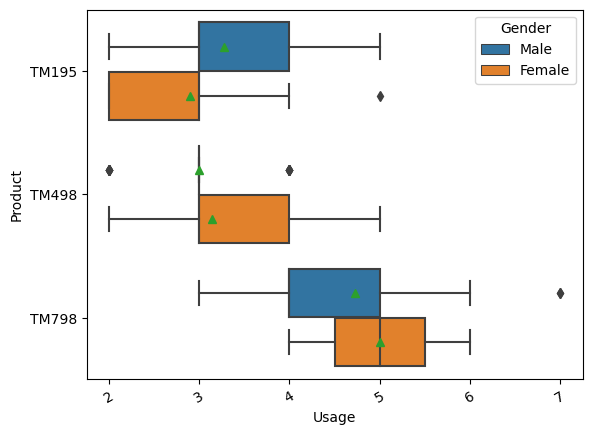

In [55]:
# Let's correlate usage with product, and we'll break that out by gender
sns.boxplot(data = cardioTreated, y = "Product", x = "Usage", hue='Gender',showmeans=True)
plt.xticks(rotation=30);

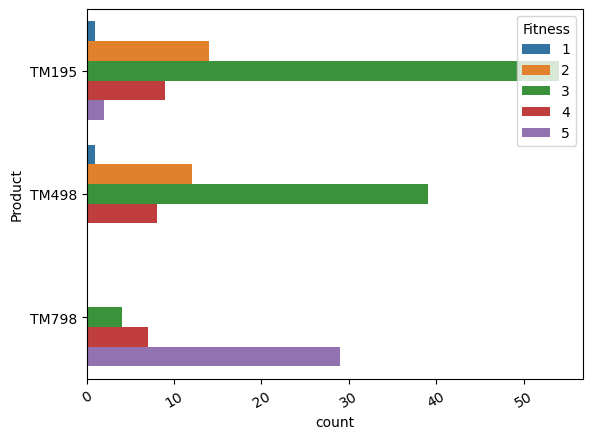

In [56]:
# Let's correlate reported fitness with product; the box plot for this looks terrible. Switching to bar plot
sns.countplot(data=cardioTreated,y='Product',hue='Fitness')
plt.xticks(rotation=30);

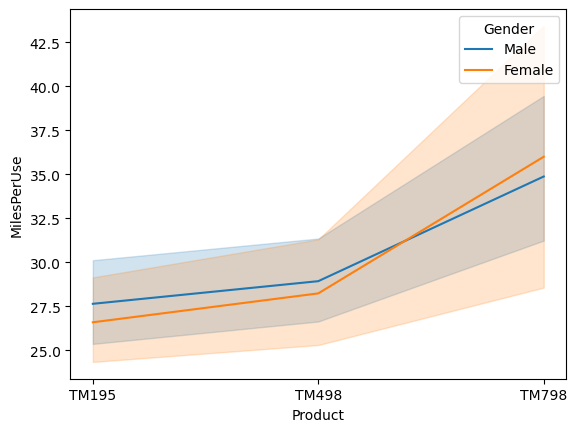

In [57]:
# Finally, let's look at the expected distances per use by product 
sns.lineplot(data=cardioTreated,x='Product', y ='MilesPerUse',hue='Gender');


Bearing in mind that miles,usage, and fitness are self-reported and aspirational, our TM798 customers expect to both use the treadmill more and expect to run longer distances. They also report being in significantly better shape.

__I would suggest that running 25-35 miles in a single session is unrealistic, and I would seek to confirm actual usage independently.__

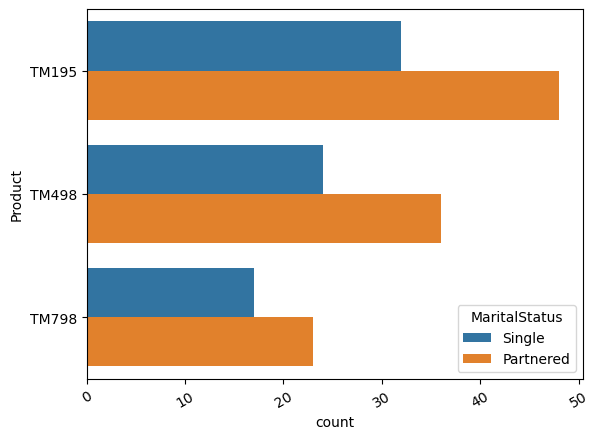

In [58]:
# Finally, let's look at marital status and gender by product to get a sense of our current installed base
sns.countplot(data=cardioTreated,y='Product',hue='MaritalStatus')
plt.xticks(rotation=30);

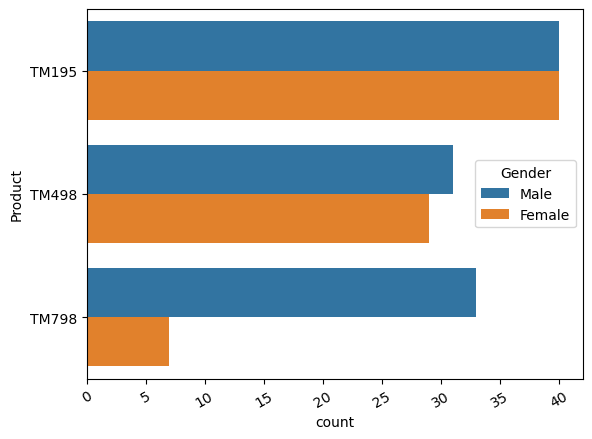

In [59]:
sns.countplot(data=cardioTreated,y='Product',hue='Gender')
plt.xticks(rotation=30);

## Product customer profiles

### TM195 Customers (mid-level fitness)
* __Our largest customer segment, this is the most popular model we currently sell__
* Typical users are 25-30 years old, and appeals fairly equally to both men and women
* Typical users are college educated with undergrad degrees, and have an income of $40-$50K
* On average, they expect to get on the treadmill about 3 times a week, running 50-100 miles a week.
* __Even in four sessions, that seems aspirational__
* Women expect lighter usage patterns - or, are more realistic about how they will use the equipment

### TM498 Customers (mid-level fitness)
* __This customer shares most of the characteristics of our TM195 users__
* These customers have a slightly higher income, and slightly more are married
* The usage patterns and fitness levels closely match the TM195

### TM798 Customers (high-level fitness)
* __This is our breakout, seriously athletic customer using our high-end product__
* These customers have more disposable income, making $60-$90K
* Also more likely to be better educated, tracking with income
* __This model is much more popular with men than with women__
* Slighty more of our customers are married than single - there's room for expansion with married partners
* As previously noted - these customer are even more markedly aspirational about the miles/week they expect to run, even accounting for more planned usage per week.



## Business Recommendations

### New Opportunity
* __Based on what we're seeing in terms of education and income, we should considering partnering with universities to get our products into their gyms.__
    * Customers that are exposed to our products have a product line that can meet their needs based on their usage, and accomodate their budgets
* __We should consider how to focus our marketing for the TM798 to reach more women.__
    * Most of our users of the high-end product are men with higher incomes. We need a feature set that appeals more to women.
* __We should seek to better differentiate between the TM195 and the TM498 with features that will drive more customers to enter the portfolio with the TM498.__
    * The usage patterns are similar. We could consider both adding features to the TM498, and reducing the price of the entry-level TM195 to get customers onboard and familiar with our products.
    
__One interesting trend we see is the tendency of customers to overestimate their usage or perhaps their fitness level. An interesting potential differentiation for the TM498 might be the integration with health apps like Fitbit to accurately track and report usage - and progress. We could use this (anonymized, aggregated) data for product development.__

### Expansion Opportunities
* __The popularity of our products with partnered customers could be enhanced with features to recognize and customize the experience by user.__
    * We want to encourage more partnered customers to buy and use the product for the entire family, which means features that can be applied for both casual and serious users.
* __We should focus some marketing effort on moving our existing TM498 customers to the TM798__
    * We can reach an installed base of both men and women with the advantages of upgrading to the high-end model
* __We want to ensure there is a easy upgrade or trade-in process to allow customers to move to more capable models as their usage and fitness improves.__
    * Or as they get married, have kids, etc.
    

## Appendix: Pandas Profiling Report

I'm using the pandas-profiling library here to perform a profile of the data. This basically walks through the steps required to comprehensively characterize the dataset, and it's definitely something I would make use of in production to save time and produce a more complete report. I'd use this to help diagnose issues with the data, as well - missing values, mis-typed variables, etc.

I understand for this program, we'll likely want to walk through each of these steps more methodically and manually in order to learn the significance of this type of step by step analysis. But I thought this package was interesting, and I'm including the results here in a collapsed section for completeness. 

While this is still currently implemented in the pandas-profiling library, the library is undergoing a name change and will ultimately transition to ydata-profiling. I did need to pip-install this library into my Anaconda environment, as well as to configure the collapsable sections feature in nbextensions.

In [60]:
cardio.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]